<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/Bias_and_Variance_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

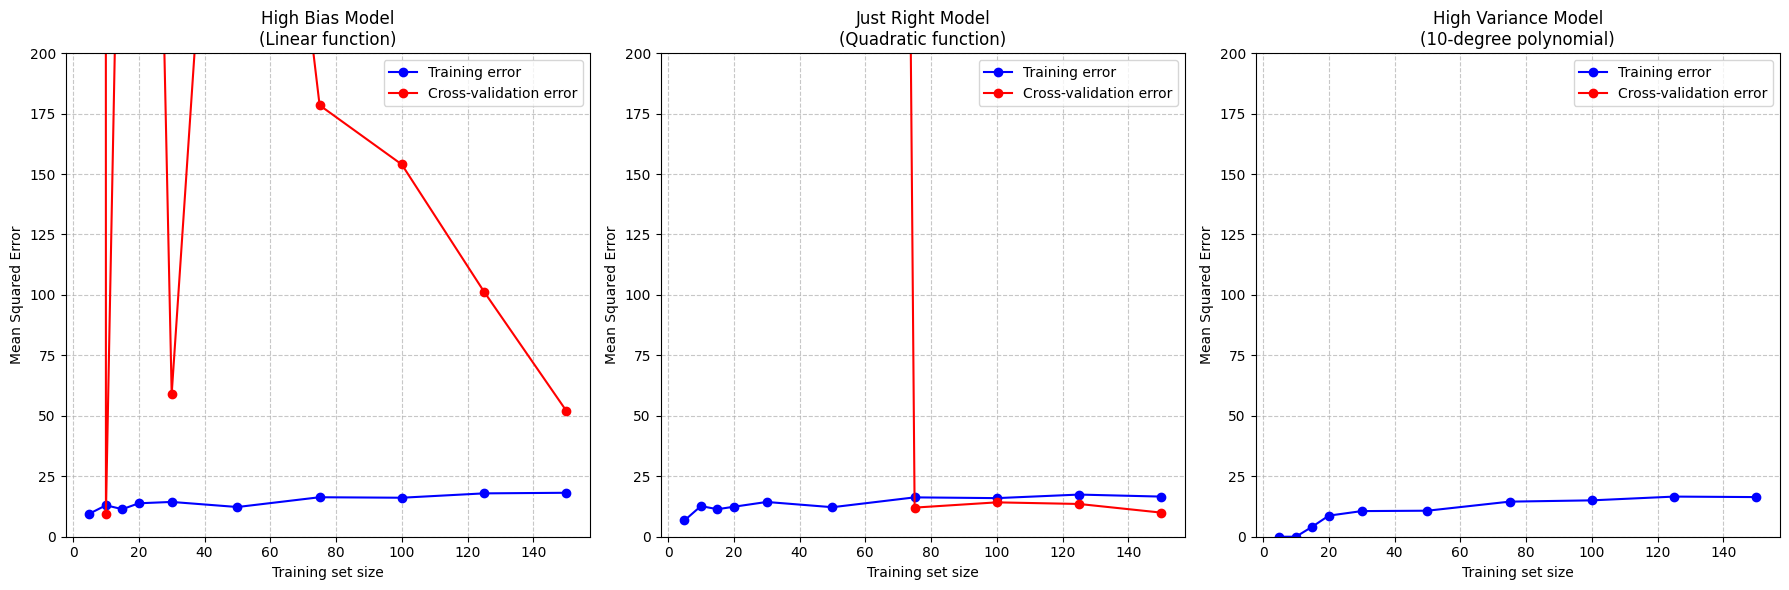

In [1]:
# Learning Curves Visualization
# This code helps visualize how high bias and high variance look in learning curves

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset (quadratic function with noise)
def generate_data(n_samples=100):
    X = np.sort(np.random.rand(n_samples) * 3)  # Feature between 0 and 3
    # True relationship is quadratic: y = 1 + 2x + 3x²
    y = 1 + 2 * X + 3 * X**2 + np.random.randn(n_samples) * 4  # Add some noise
    return X.reshape(-1, 1), y  # Reshape X for sklearn

# Create a larger dataset for full testing
X_full, y_full = generate_data(200)

# Split into training and cross-validation sets
X_train_full, y_train_full = X_full[:150], y_full[:150]
X_cv, y_cv = X_full[150:], y_full[150:]

# Function to compute learning curves
def compute_learning_curve(model_maker, X_train_full, y_train_full, X_cv, y_cv, train_sizes):
    train_errors = []
    cv_errors = []

    for size in train_sizes:
        # Train on subset of training data
        X_subset = X_train_full[:size]
        y_subset = y_train_full[:size]

        # Create and train the model
        model = model_maker()
        model.fit(X_subset, y_subset)

        # Compute training and CV errors
        y_train_pred = model.predict(X_subset)
        train_error = mean_squared_error(y_subset, y_train_pred)

        y_cv_pred = model.predict(X_cv)
        cv_error = mean_squared_error(y_cv, y_cv_pred)

        train_errors.append(train_error)
        cv_errors.append(cv_error)

    return train_errors, cv_errors

# Define our training set sizes
train_sizes = [5, 10, 15, 20, 30, 50, 75, 100, 125, 150]

# Create model factories for different complexity levels

# High Bias Model: Linear model (underfitting for quadratic data)
def make_linear_model():
    return LinearRegression()

# Good Fit Model: Quadratic model (right complexity)
def make_quadratic_model():
    return make_pipeline(PolynomialFeatures(2), LinearRegression())

# High Variance Model: 10-degree polynomial (overfitting)
def make_complex_model():
    return make_pipeline(PolynomialFeatures(10), LinearRegression())

# Compute learning curves for each model
linear_train_errors, linear_cv_errors = compute_learning_curve(
    make_linear_model, X_train_full, y_train_full, X_cv, y_cv, train_sizes)

quadratic_train_errors, quadratic_cv_errors = compute_learning_curve(
    make_quadratic_model, X_train_full, y_train_full, X_cv, y_cv, train_sizes)

complex_train_errors, complex_cv_errors = compute_learning_curve(
    make_complex_model, X_train_full, y_train_full, X_cv, y_cv, train_sizes)

# Plot the learning curves
plt.figure(figsize=(18, 6))

# High Bias (Linear Model)
plt.subplot(1, 3, 1)
plt.plot(train_sizes, linear_train_errors, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, linear_cv_errors, 'o-', color='red', label='Cross-validation error')
plt.title('High Bias Model\n(Linear function)')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 200])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Just Right (Quadratic Model)
plt.subplot(1, 3, 2)
plt.plot(train_sizes, quadratic_train_errors, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, quadratic_cv_errors, 'o-', color='red', label='Cross-validation error')
plt.title('Just Right Model\n(Quadratic function)')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 200])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# High Variance (Complex Model)
plt.subplot(1, 3, 3)
plt.plot(train_sizes, complex_train_errors, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, complex_cv_errors, 'o-', color='red', label='Cross-validation error')
plt.title('High Variance Model\n(10-degree polynomial)')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.ylim([0, 200])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Try changing these parameters to see how they affect learning curves:
# 1. Change the noise level in generate_data()
# 2. Try different polynomial degrees in make_complex_model()
# 3. Try different train_sizes values